# Flattening the curve: Assessing the impact of social distancing on COVID-19 in Belgium with the SEIR model

The use of the SEIR model for COVID-19 analysis is described for China here: https://www.nature.com/articles/s41421-020-0148-0. Initial value of the parameters have been taken from this article and adapted to fit the Belgian pre-lockdown data.

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$S$: The number of susceptible <br>
$E$: The number of exposed <br>
$I$: The number of infectious <br>
$R$: The number of recovered <br>
$\beta$: The parameter controlling how often a susceptible-infected contact results in a new exposure <br>
$\sigma$: The rate at which an exposed person becomes infective <br>
$\gamma$: The rate an infected recovers and moves into the resistant phase <br>
$N$: The total population <br>
$R_0$: The basic reproduciton number (i.e. the average number of infections directly generated by one infectious)

$
\begin{align}
\frac{dS}{dt} =& -\frac{\beta SI}{N} \\
\frac{dE}{dt} =& \frac{\beta SI}{N} - \sigma E \\
\frac{dI}{dt} =& \sigma E - \gamma I \\
\frac{dR}{dt} =& \gamma I \\
N =& S + E + I + R \\
R_0 =& \beta \gamma
\end{align} 
$

In [21]:
R0 = 4
sigma = 1/1.0
gamma = 1/12.0 
beta = R0*gamma
N = 11.4*10**6 # Belgian population
I0 = 2 # Two cases on March 1st
E0 = 40*I0 # In general, E0 is 30 to 40 times higher than I0
S0 = N-I0-E0
z0 = [S0,E0, I0]
ts = 0.0
tf = 365
Dt = 1.0
t  = np.arange(ts, tf+Dt, Dt)
n_cases = np.asarray([2, 8, 13, 23, 50, 109, 169, 200, 239, 267, 314, 399, 559, 689]) # Source https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Belgium

In [22]:
# Model definition
def model(z,t,beta,sigma,gamma):
	S = z[0]
	E = z[1]
	I = z[2]
	dSdt = - beta*S*I/N
	dEdt = beta*S*I/N - sigma*E
	dIdt = sigma*E - gamma*I
	return [dSdt, dEdt, dIdt]

In [23]:
# Model solve with R0 unchanged
z = odeint(model,z0,t,args=(beta,sigma,gamma))
S = z[:,0]
E = z[:,1]
I = z[:,2]
R = N - (S+E+I)

# Model solve with R0 decreased by 25% after lockdown
beta25 = beta*0.75
I0 = I[12] 
E0 = E[12]
S0 = S[12]
z0 = [S0,E0, I0]
z25 = odeint(model,z0,t,args=(beta25,sigma,gamma))
S25 = z25[:,0]
E25 = z25[:,1]
I25 = z25[:,2]
R25 = N - (S25+E25+I25)
S25 = np.concatenate((S[:12], S25[:-12]))
E25 = np.concatenate((E[:12], E25[:-12]))
I25 = np.concatenate((I[:12], I25[:-12]))
R25 = np.concatenate((R[:12], R25[:-12]))

# Model solve with R0 decreased by 50% after lockdown
beta50 = beta*0.5
z50 = odeint(model,z0,t,args=(beta50,sigma,gamma))
S50 = z50[:,0]
E50 = z50[:,1]
I50 = z50[:,2]
R50 = N - (S50+E50+I50)
S50 = np.concatenate((S[:12], S50[:-12]))
E50 = np.concatenate((E[:12], E50[:-12]))
I50 = np.concatenate((I[:12], I50[:-12]))
R50 = np.concatenate((R[:12], R50[:-12]))

# Model solve with R0 decreased by 75% after lockdown
beta75 = beta*0.25
z75 = odeint(model,z0,t,args=(beta75,sigma,gamma))
S75 = z75[:,0]
E75 = z75[:,1]
I75 = z75[:,2]
R75 = N - (S75+E75+I75)
S75 = np.concatenate((S[:12], S75[:-12]))
E75 = np.concatenate((E[:12], E75[:-12]))
I75 = np.concatenate((I[:12], I75[:-12]))
R75 = np.concatenate((R[:12], R75[:-12]))

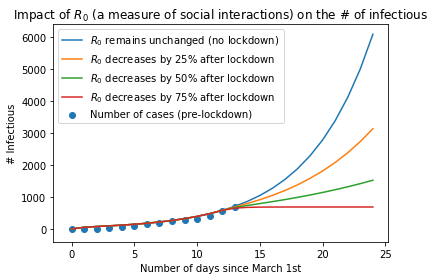

In [24]:
#Ploting
plt.plot(t[:25],I[:25], label='$R_0$ remains unchanged (no lockdown)')
plt.plot(t[:25],I25[:25], label='$R_0$ decreases by 25$\%$ after lockdown')
plt.plot(t[:25],I50[:25], label='$R_0$ decreases by 50$\%$ after lockdown')
plt.plot(t[:25],I75[:25], label='$R_0$ decreases by 75$\%$ after lockdown')
plt.scatter([i for i in range(14)], n_cases, label='Number of cases (pre-lockdown)')
plt.ylabel('# Infectious')
plt.xlabel('Number of days since March 1st')
plt.title('Impact of $R_0$ (a measure of social interactions) on the # of infectious')
plt.legend()
plt.show()

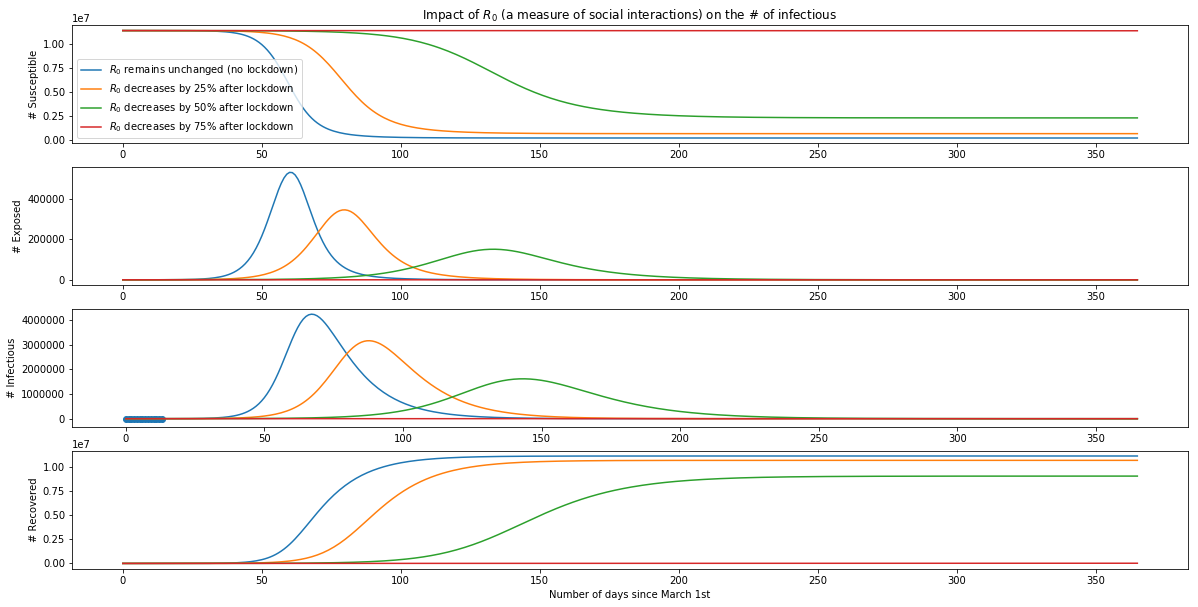

In [25]:
#Ploting
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(t,S, label='$R_0$ remains unchanged (no lockdown)')
plt.plot(t,S25, label='$R_0$ decreases by 25$\%$ after lockdown')
plt.plot(t,S50, label='$R_0$ decreases by 50$\%$ after lockdown')
plt.plot(t,S75, label='$R_0$ decreases by 75$\%$ after lockdown')
plt.legend()
plt.title('Impact of $R_0$ (a measure of social interactions) on the # of infectious')
plt.ylabel('# Susceptible')
plt.subplot(412)
plt.plot(t,E)
plt.plot(t,E25)
plt.plot(t,E50)
plt.plot(t,E75)
plt.ylabel('# Exposed')
plt.subplot(413)
plt.plot(t,I)
plt.plot(t,I25)
plt.plot(t,I50)
plt.plot(t,I75)
plt.scatter([i for i in range(14)], n_cases, label='Number of cases (pre-lockdown)')
plt.ylabel('# Infectious')
plt.subplot(414)
plt.plot(t,R)
plt.plot(t,R25)
plt.plot(t,R50)
plt.plot(t,R75)
plt.xlabel('Number of days since March 1st')
plt.ylabel('# Recovered')
plt.savefig('./SEIR_time.png')
plt.show()